In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev
import ast

In [2]:
Movie = pd.read_csv('movie_collection_data.csv',na_filter=True, na_values='[]')


# Dropping invalid Data

In [3]:
## Drop INVALID DATA
Movie_CleanedData = Movie[~(Movie['Budget']<281)]
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Revenue']==0)]
Movie_CleanedData.drop_duplicates(subset="Movie_name",keep=False, inplace =True)
Movie_CleanedData = Movie_CleanedData.dropna(subset=['ReleaseDate','SpokenLanguage','ProductionCompany','ProductionCountry','GenreList'])
Movie_CleanedData.index = pd.RangeIndex(len(Movie_CleanedData.index))
Movie_CleanedData.index = range(len(Movie_CleanedData.index))
Movie_CleanedData.head()


,Movie_name,Adult,GenreList,Budget,Popularity,VoteAvg,VoteCount,Overview,Tagline,Revenue,ReleaseDate,Runtime,OriginalLanguage,ProductionCompany,ProductionCountry,SpokenLanguage
0,Godzilla vs. Kong,False,"['Action', 'Science Fiction']",200000000,15798.548,8.5,3622,"In a time when monsters walk the Earth, humani...",One Will Fall,285400000,2021-03-24,113.0,en,"[['Warner Bros. Pictures', 'US'], ['Legendary ...",['US'],['en']
1,Wonder Woman 1984,False,"['Fantasy', 'Action', 'Adventure']",200000000,1818.337,6.8,4695,A botched store robbery places Wonder Woman in...,A new era of wonder begins.,165160000,2020-12-16,151.0,en,"[['DC Entertainment', 'US'], ['Warner Bros. Pi...",['US'],['en']
2,Monster Hunter,False,"['Fantasy', 'Action', 'Adventure']",60000000,1701.854,7.1,1368,A portal transports Cpt. Artemis and an elite ...,"Behind our world, there is another.",25814306,2020-12-03,104.0,en,"[['CAPCOM', 'JP'], ['Constantin Film', 'DE'], ...","['DE', 'CA', 'CN', 'US', 'JP']",['en']
3,Tom & Jerry,False,"['Action', 'Comedy', 'Family', 'Animation']",50000000,2009.347,7.4,1120,Tom the cat and Jerry the mouse get kicked out...,Best of enemies. Worst of friends.,66890000,2021-02-11,101.0,en,"[['Warner Animation Group', 'US'], ['Warner Br...",['US'],['en']
4,The Little Things,False,"['Thriller', 'Crime']",30000000,1072.389,6.4,708,"Deputy Sheriff Joe ""Deke"" Deacon joins forces ...",Some things never let us go.,23205000,2021-01-28,128.0,en,"[['Warner Bros. Pictures', 'US'], ['Gran Via P...",['US'],['en']


## Calculate and Insert Profit Variable

In [4]:
Profit=[]
for i in range(len(Movie_CleanedData)):
    Profit.append(Movie_CleanedData.iloc[i,3]-Movie_CleanedData.iloc[i,9])
Movie_CleanedData.insert(10,"Profit",Profit,True)

## Create new column for release year and month

In [5]:
Movie_CleanedData['Year'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).year
Movie_CleanedData['Month'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).month

In [6]:
Movie_CleanedData.describe()

,Budget,Popularity,VoteAvg,VoteCount,Revenue,Profit,Runtime,Year,Month
count,4.111000e+03,4111.000000,4111.000000,4111.000000,4.111000e+03,4.111000e+03,4111.000000,4111.000000,4111.000000
mean,3.989656e+07,34.115138,6.545026,2406.900511,1.234886e+08,-8.359203e+07,109.893213,2004.019460,6.918025
std,4.475251e+07,255.646902,0.822419,3162.449867,1.971951e+08,1.680226e+08,19.835517,13.411533,3.389887
min,3.000000e+02,8.022000,0.000000,0.000000,1.000000e+00,-2.550965e+09,26.000000,1920.000000,1.000000
25%,1.000000e+07,13.381500,6.000000,573.000000,1.796321e+07,-9.766589e+07,96.000000,1999.000000,4.000000
50%,2.500000e+07,17.367000,6.500000,1219.000000,5.573659e+07,-2.745648e+07,106.000000,2007.000000,7.000000
75%,5.000000e+07,27.963000,7.100000,2863.500000,1.458449e+08,-8.526170e+05,120.000000,2014.000000,10.000000
max,3.800000e+08,15798.548000,8.700000,28776.000000,2.797801e+09,1.657101e+08,248.000000,2021.000000,12.000000


## Create Columns for Categorical Data


In [7]:
for i in range(len(Movie_CleanedData)):
    x = ast.literal_eval(Movie_CleanedData.loc[i,'GenreList'])
    Movie_CleanedData.at[i,'GenreList'] = x
genrecount = 0
for i in range(len(Movie_CleanedData)):
    count = len(Movie_CleanedData.loc[i,'GenreList'])
    if count>genrecount:
        genrecount = count
        print(genrecount)
        maxindex = i
print(Movie_CleanedData.loc[maxindex,'GenreList'])
    
    
    

2

3

4

5

6

8

['Adventure', 'Fantasy', 'Animation', 'Action', 'Comedy', 'Thriller', 'Science Fiction', 'Family']


## Determine outliers


In [8]:

Q1 = (int)(Movie_CleanedData.VoteCount.quantile(0.25)) 
Q3 = (int)(Movie_CleanedData.VoteCount.quantile(0.75))
median = (int)(Movie_CleanedData.VoteCount.quantile(0.5))
median_avg = (int)(Movie_CleanedData.VoteAvg.quantile(0.5))
IQR = Q3 - Q1

for i in range(len(Movie_CleanedData)): 
     if Movie_CleanedData.loc[i,'VoteCount']>(Q3 + 1.5 * IQR) or Movie_CleanedData.loc[i,'VoteCount']<(Q1 - 1.5 * IQR):
        Movie_CleanedData.loc[i,'VoteCount']=median
        Movie_CleanedData.loc[i,'VoteAvg'] = median_avg


## EXPLORATORY ANALYSIS

In [9]:
Movie_CleanedData.describe()

,Budget,Popularity,VoteAvg,VoteCount,Revenue,Profit,Runtime,Year,Month
count,4.111000e+03,4111.000000,4111.000000,4111.000000,4.111000e+03,4.111000e+03,4111.000000,4111.000000,4111.000000
mean,3.989656e+07,34.115138,6.420336,1564.186086,1.234886e+08,-8.359203e+07,109.893213,2004.019460,6.918025
std,4.475251e+07,255.646902,0.764581,1380.074168,1.971951e+08,1.680226e+08,19.835517,13.411533,3.389887
min,3.000000e+02,8.022000,0.000000,0.000000,1.000000e+00,-2.550965e+09,26.000000,1920.000000,1.000000
25%,1.000000e+07,13.381500,6.000000,573.000000,1.796321e+07,-9.766589e+07,96.000000,1999.000000,4.000000
50%,2.500000e+07,17.367000,6.400000,1219.000000,5.573659e+07,-2.745648e+07,106.000000,2007.000000,7.000000
75%,5.000000e+07,27.963000,6.900000,2108.500000,1.458449e+08,-8.526170e+05,120.000000,2014.000000,10.000000
max,3.800000e+08,15798.548000,8.700000,6271.000000,2.797801e+09,1.657101e+08,248.000000,2021.000000,12.000000


In [10]:
NumericData =pd.DataFrame(Movie_CleanedData[['Budget','Popularity','VoteAvg','VoteCount','Revenue','Profit','Runtime','Year','Month']])
NumericData.head()

,Budget,Popularity,VoteAvg,VoteCount,Revenue,Profit,Runtime,Year,Month
0,200000000,15798.548,8.5,3622,285400000,-85400000,113.0,2021,3
1,200000000,1818.337,6.8,4695,165160000,34840000,151.0,2020,12
2,60000000,1701.854,7.1,1368,25814306,34185694,104.0,2020,12
3,50000000,2009.347,7.4,1120,66890000,-16890000,101.0,2021,2
4,30000000,1072.389,6.4,708,23205000,6795000,128.0,2021,1


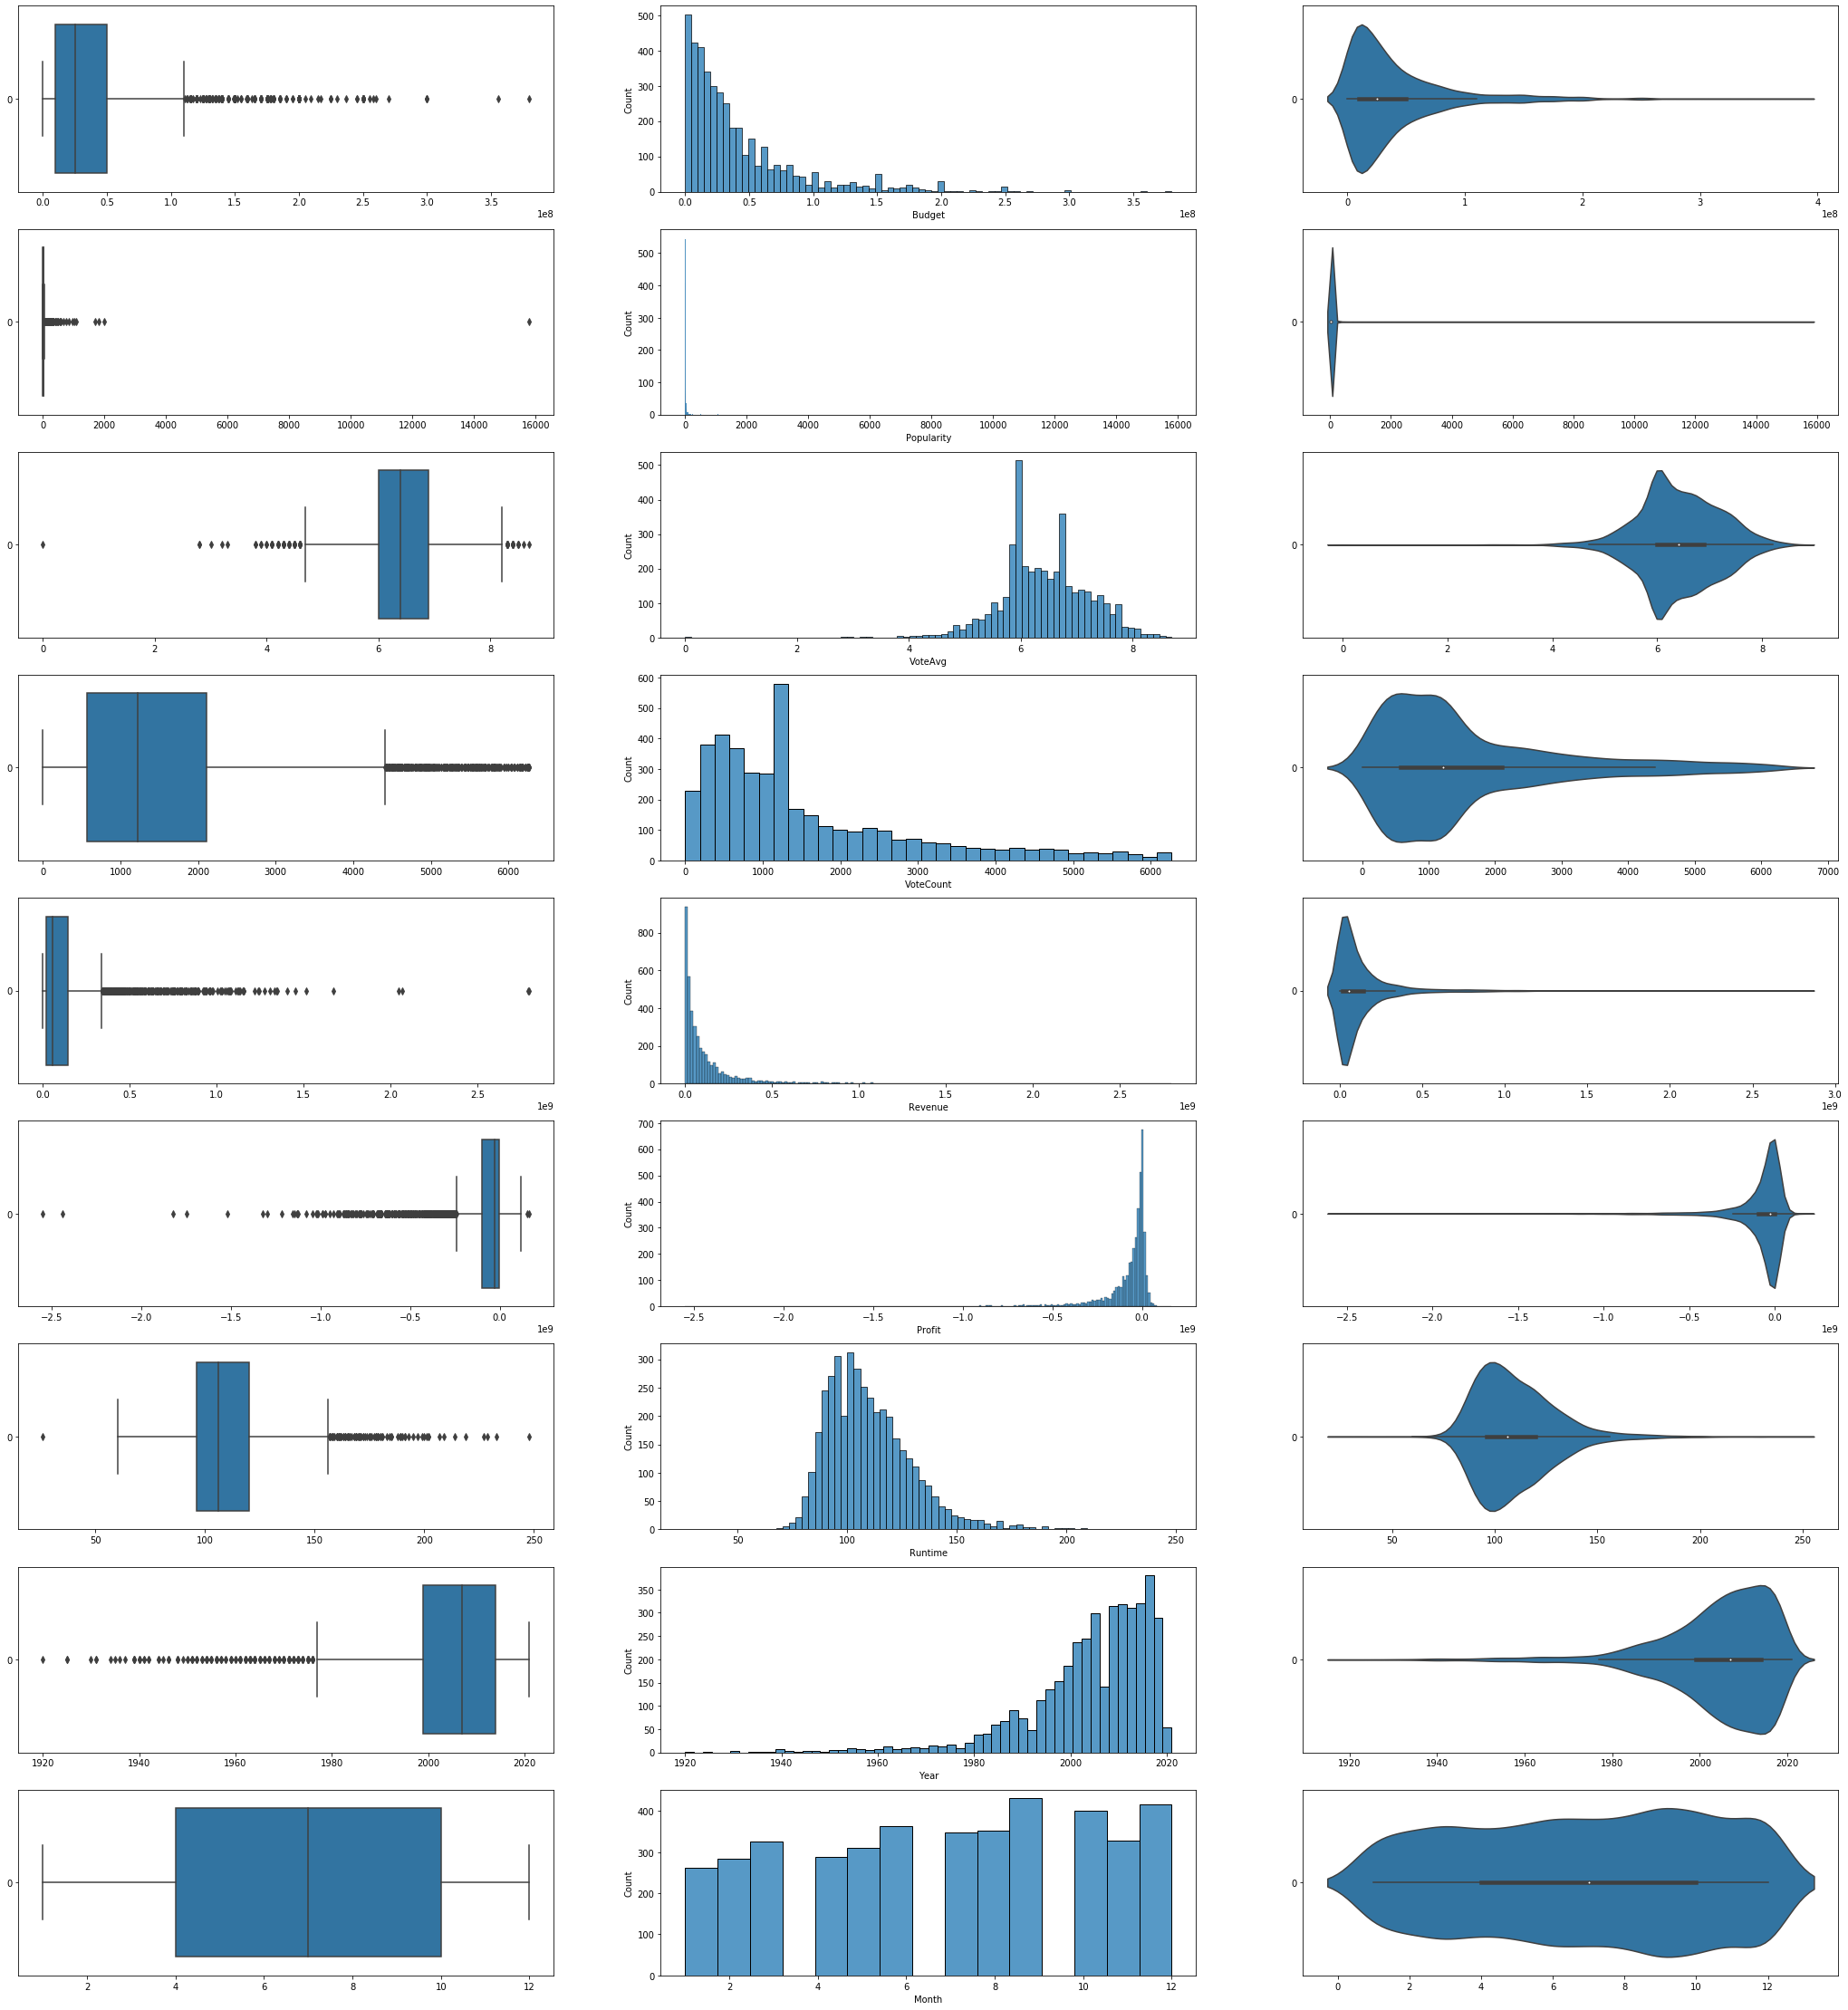

In [11]:
f, axes = plt.subplots(9, 3, figsize=(36, 40))

count = 0
for var in NumericData:
    sb.boxplot(data = NumericData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = NumericData[var], ax = axes[count,1])
    sb.violinplot(data = NumericData[var], orient = "h", ax = axes[count,2])
    count += 1

              Budget  Popularity   VoteAvg  VoteCount   Revenue    Profit  \
Budget      1.000000    0.111192 -0.163952   0.300373  0.717118 -0.575278   
Popularity  0.111192    1.000000  0.044347   0.052425  0.072433 -0.055394   
VoteAvg    -0.163952    0.044347  1.000000   0.310256 -0.077000  0.046701   
VoteCount   0.300373    0.052425  0.310256   1.000000  0.268926 -0.235614   
Revenue     0.717118    0.072433 -0.077000   0.268926  1.000000 -0.982619   
Profit     -0.575278   -0.055394  0.046701  -0.235614 -0.982619  1.000000   
Runtime     0.257100    0.019233  0.305824   0.130587  0.255329 -0.231182   
Year        0.228176    0.062353 -0.241957   0.099755  0.131271 -0.093288   
Month       0.029481   -0.016101  0.093758   0.008217  0.038644 -0.037502   

             Runtime      Year     Month  
Budget      0.257100  0.228176  0.029481  
Popularity  0.019233  0.062353 -0.016101  
VoteAvg     0.305824 -0.241957  0.093758  
VoteCount   0.130587  0.099755  0.008217  
Revenue     0.

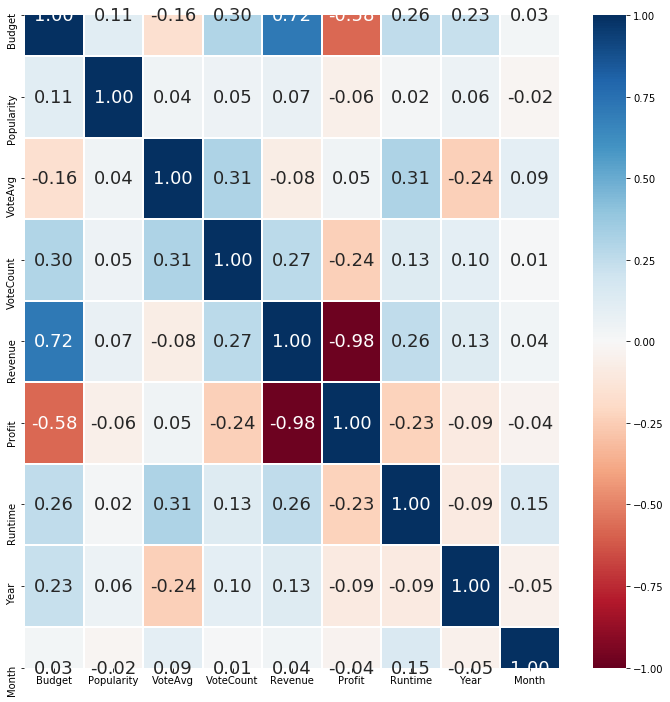

In [12]:

# Correlation Matrix
print(NumericData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(NumericData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [13]:
CategoricalData = pd.DataFrame(Movie_CleanedData[['Adult','GenreList','OriginalLanguage','ProductionCompany','ProductionCountry','SpokenLanguage']])

C:\Users\KohJunKai\Anaconda3\lib\site-packages\numpy\lib\histograms.py:656: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)
C:\Users\KohJunKai\Anaconda3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


AttributeError: module 'pandas' has no attribute 'CategoricalData'

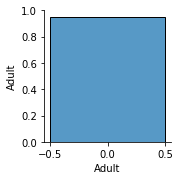

In [14]:

sb.pairplot(data = CategoricalData)

CategoricalData = pd.CategoricalData(Movie_CleanedData[['Adult','GenreList','OriginalLanguage','ProductionCompany','ProductionCountry','SpokenLanguage']])
CategoricalData.head()

CategoricalData['MSSubClass'] = CategoricalData['MSSubClass'].astype('category')
CategoricalData['Neighborhood'] = CategoricalData['Neighborhood'].astype('category')
CategoricalData['BldgType'] = CategoricalData['BldgType'].astype('category')
CategoricalData['OverallQual'] = CategoricalData['OverallQual'].astype('category')